# Fourier Transform

- toc: true 
- badges: true
- categories: [jupyter]
- image: images/fourier-transform.png

Fourier transform decomposes a signal into the sinusoidal components with different amplitude, frequency and phases such that the sum of those components equals to the signal. It transforms a signal from time domain to frequency domain. Fourier transform is applicable to both continuous and discrete signals. In this post, we will only cover the discrete case. 

For a signal with N points, Discrete Fourier Transform uses the following bases:

$e^{i~2\pi~k} = \cos (2\pi~k)+i\sin (2\pi~k)$ 

for k = -N/2 ... N/2 where k=1 means 1 cycle per signal. 

## Nyquist's Sampling Theorem

To be able to measure a sinusoidal wave, we need to sample at least two points within its one full cycle, i.e., one point in half cycle. Therefore, we cannot measure the components that make more than N/2 cycles within N timesteps. This is known as Nyquist's sampling theorem. In practice, because of the risk of sampling those two points near zero crossings, we are only confident about the components with frequencies lower than N/4.

As an example, let's see the measurements from 1 Hz sine wave with various sampling rates. Nyquist's sampling theorem requires at least 2 Hz sampling rate for this signal. As you can see in the figure below, the sampling rate of 1 Hz (blue) measures a flat line. While sampling rate of 2 Hz (orange) is theoretically sufficent, its amplitude is far from the original's. As the sampling rate increases, the measurement becomes more accurate. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Original signal
w = 1 # frequency of sine wave, [Hz]
T = 3 # duration of signal [second]
fs = 128 # underlying sampling rate of signal[Hz]

t = np.linspace(0, T, fs * T)
y = np.sin(2*np.pi*w*t)
indices = np.arange(len(t))
fs_list = [1, 2, 4, 10]

samples = []
for f in fs_list:
    offset = np.random.randint(0, 10)
    idx = indices[:-offset:fs//f] + offset
    t_sampled = t[idx]
    y_sampled = y[idx]
    samples.append((f, t_sampled, y_sampled))

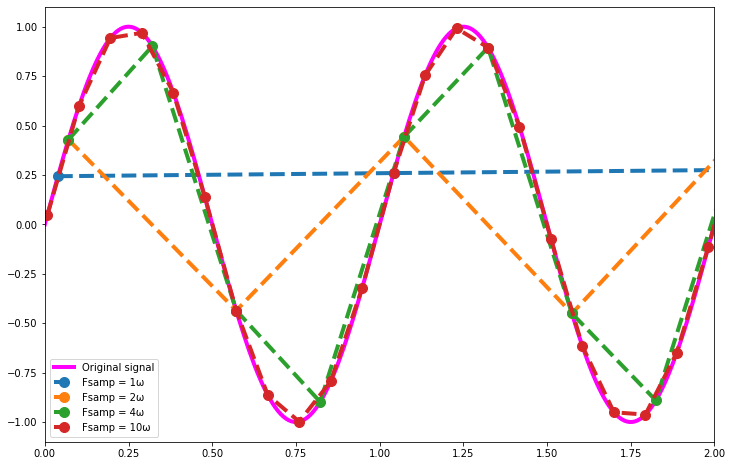

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(t, y, color='magenta', lw=4);

legends = ['Original signal']
for f, ts, ys in samples:
    plt.plot(ts, ys, marker='o', ms=10, linestyle='--', lw=4);
    legends.append(f'Fsamp = {f}ω')
plt.legend(legends, loc='lower left')
plt.xlim([0, 2]);

## Discrete Fourier Transform

Discrete Fourier Transform

$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}
$

Inverse Discrete Fourier Transform

$
x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i~2\pi~k~n~/~N}
$

The intuition behind first formula is that k<sup>th</sup> cosine component takes k/N cycles in 1 timestep or point interval. In other words, its angular velocity is 2πk/N radians/timestep. To make k<sup>th</sup> component's peak align with n<sup>th</sup> point, we need adjust the phase of k<sup>th</sup> component. Since it takes 2πk/N radians in one timestep, until n<sup>th</sup> point, it takes 2πkn/N radians. Therefore, we need to delay this component for 2πkn/N radians. To delay, we need to subtract from its phase, which means rotating its complex representation in negative/counter-clock-wise direction. Hence, there is a minus sign in front. 

From the above formula, for N point signal, a naive Fourier Transform algorithm has O(N<sup>2</sup>) time complexity. However, 
[Cooley and Tukey (1965)](https://en.wikipedia.org/wiki/Fast_Fourier_transform#Cooley%E2%80%93Tukey_algorithm) proposed an O(N*lgN) algorithm, hence, Fast Fourier Transform. It benefits the symmetry in the problem and uses recursive divide-conquer approach. Checkout [this detailed explanation](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/) of FFT algorithm, if you're interested.

Numpy provides FFT algorithm in ```numpy.fft``` subpackage along with some utilities. 

Let's have a signal consisting of two sinusoidal waves with 5 Hz and 10 Hz and uniform noise. Since FFT makes recursive calls to divide the signal into two halves, the number of points in the signal must be power of 2.

In [4]:
fs = 128 # sampling rate, [Hz]
T = 1 # duration of signal, [second]
t = np.linspace(0, T, fs)
N = len(t)

In [5]:
components = [
    (1, 5, np.pi/4), # amplitude, frequency [Hz], phase [radian]
    (2, 10, 0),
]

signal = sum([a * np.cos(2*np.pi*w*t + p) for (a, w, p) in components])
noise = 1*np.random.uniform(-1, 1, N)
x = signal + noise

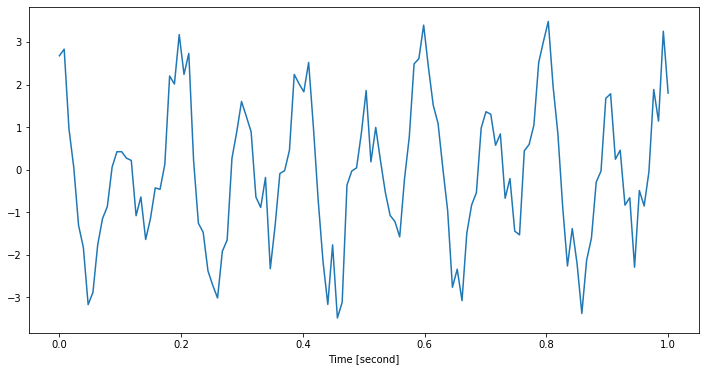

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.xlabel("Time [second]");

DFT produces N complex coefficients x<sub>k</sub> per each component with frequency of k. Here, k denotes normalized frequency with unit of cycle/point and it ranges from -0.5 to 0.5. We can convert these frequencies to Hertz, by substituting point with time interval between consecutive points.

$$ \frac{cycle}{point} = \frac{cycle}{\frac{t~seconds}{N~points}} = \frac{N}{t} * \frac{cycle}{second} = \frac{N}{t}~Hz
$$


Numpy provides a utility function ```numpy.fft.fftfreq```, that takes number of points in DFT and timestep which is multiplicative inverse of sampling rate.

In [7]:
N = len(signal)
xk = np.fft.fft(x)
freq = np.fft.fftfreq(n=N, d=1/fs)

In [8]:
print(xk[:5])

[-7.59644306+0.j         -0.31847512+9.55567417j -0.6212007 -4.70779516j
  4.16027703+6.99437815j  9.82600143-0.02623135j]


In [9]:
print(freq)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63. -64. -63. -62. -61. -60. -59.
 -58. -57. -56. -55. -54. -53. -52. -51. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]


In [10]:
# the frequencies
normalized_freq = np.fft.fftfreq(n=N)
freq_manual = normalized_freq * N / T

assert np.allclose(freq, freq_manual)

In [11]:
# Bring negative frequencies to the front of the array
fr = np.roll(freq, N//2)
amp = np.roll(np.abs(xk), N//2)
phase = np.roll(np.angle(xk), N//2)

Text(0.5, 0, 'Frequency [Hz]')

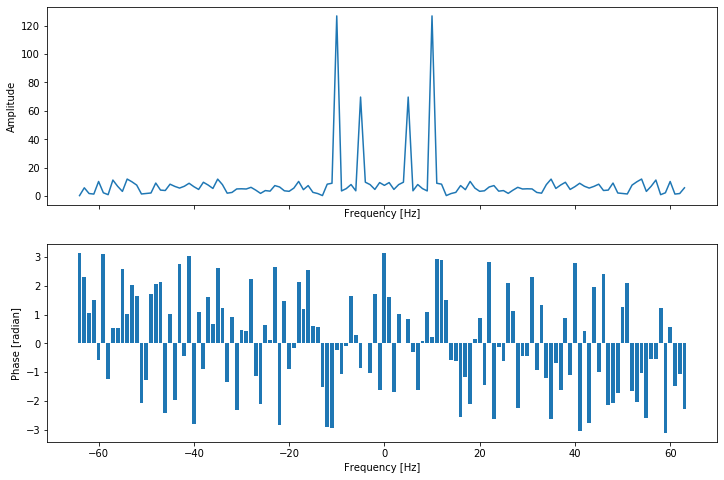

In [12]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, sharex=True)
axes[0].plot(fr, amp)
axes[0].set_ylabel("Amplitude");
axes[0].set_xlabel("Frequency [Hz]")
axes[1].bar(fr, phase)
axes[1].set_ylabel("Phase [radian]")
axes[1].set_xlabel("Frequency [Hz]")

## Inverse Discrete Fourier Transform

$
x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i~2\pi~k~n~/~N}
$

Now, we have the information about each of the components in the signal. We can reconstruct the original signal, by combining those components. For this, we first convert each coefficient x<sub>k</sub> into cosine and sine waves by multiplying with $e^{i~2\pi~k~n~/~N}$. Then, we sum all these waves per component and normalize it by number of points.

Numpy provides inverse FFT function ```numpy.fft.ifft```, which takes N complex coefficients x_k and outputs N complex numbers with very small imaginary parts. Remember, 

$$e^{ix} = \cos (x)+i\sin (x)$$
$$ cos(-x) = cos(x) $$
$$ sin(-x) = -sin(x) $$ 


Therefore, while summing up the components, the imaginary parts (sine) for negative and positive frequencies cancels each other. Whereas, real parts (cosine) add up.

In [13]:
rec_signal = np.real(np.fft.ifft(xk))

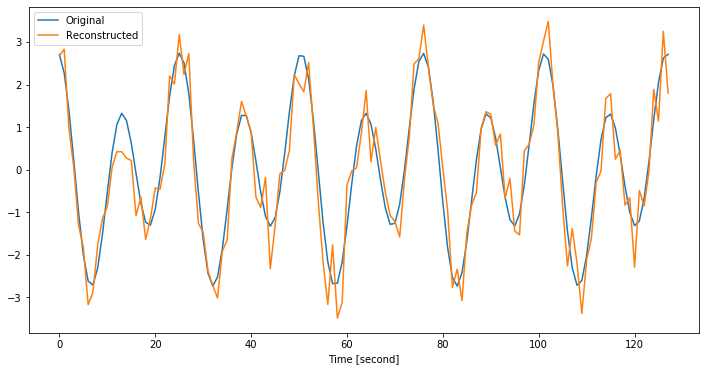

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(signal)
plt.plot(rec_signal)
plt.xlabel("Time [second]")
plt.legend(["Original", "Reconstructed"]);

## Components

In [15]:
def get_component_params(xk, freq):
    component = 2 * xk[freq] # multiply by two to include -freq as well
    phase = np.angle(component)
    amplitude = np.abs(component) / N
    return amplitude, phase

In [16]:
def make_component_signal(xk, freq, t):
    amplitude, phase = get_component_params(xk, freq)
    component_signal = amplitude * np.cos(2 * np.pi * freq * t + phase)
    return component_signal

In [17]:
for a, f, ph in components:
    amp, phase = get_component_params(xk, f)
    print(f"Component {f} Hz")
    print(f"Given amplitude: {a:4.2f} phase: {np.rad2deg(ph):4.1f} deg")
    print(f"Found amplitude: {amp:4.2f} phase: {np.rad2deg(phase):4.1f} deg")
    print('='*40)

Component 5 Hz
Given amplitude: 1.00 phase: 45.0 deg
Found amplitude: 1.09 phase: 49.2 deg
Component 10 Hz
Given amplitude: 2.00 phase:  0.0 deg
Found amplitude: 1.98 phase: 13.1 deg


In [18]:
c5 = make_component_signal(xk, 5, t)

In [19]:
c10 = make_component_signal(xk, 10, t)

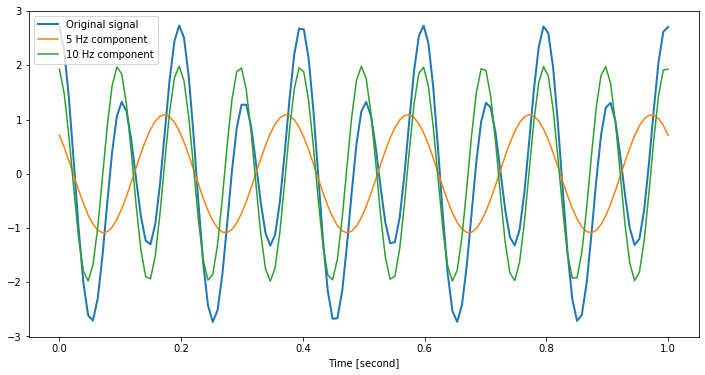

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(t, signal, linewidth=2)
plt.plot(t, c5, t, c10)
plt.xlabel("Time [second]")
plt.legend(['Original signal', '5 Hz component', '10 Hz component']);

## Conclusion

FFT transforms a signal from time domain to frequency domain and for some problems, frequency domain is more feasible to work with. FFT has usages in many fields such as,
* Solving differential equations
* Signal filtering algorithms
* System identification